In [122]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

In [11]:
train_data = pd.read_csv("/train.csv")
valid_data = pd.read_csv("/valid.csv")

In [104]:
print(train_data.head())
print(Counter(train_data['Y']))

         Id  ...        Y
0  34552974  ...  LQ_EDIT
1  34554721  ...  LQ_EDIT
2  34555135  ...       HQ
3  34555448  ...  LQ_EDIT
4  34555752  ...  LQ_EDIT

[5 rows x 6 columns]
Counter({'LQ_EDIT': 5000, 'HQ': 5000, 'LQ_CLOSE': 5000})


In [157]:
grouped = train_data.groupby('Y').Tags.apply(list).reset_index()

grouped.loc[0,"Tags"] = [j for i in grouped.loc[0,"Tags"] 
                         for j in i.replace('<', '').replace('>', ' ').split(' ')
                         if j != '']

grouped.loc[1,"Tags"] = [j for i in grouped.loc[1,"Tags"] 
                         for j in i.replace('<', '').replace('>', ' ').split(' ')
                         if j != '']

grouped.loc[2,"Tags"] = [j for i in grouped.loc[2,"Tags"] 
                         for j in i.replace('<', '').replace('>', ' ').split(' ')
                         if j != '']



print(grouped)
x = Counter(grouped.loc[0,"Tags"]).most_common(10)
print(Counter(grouped.loc[1,"Tags"]).most_common(5))
print(Counter(grouped.loc[2,"Tags"]).most_common(5))


          Y                                               Tags
0        HQ  [python, pandas, typescript, ecmascript-6, es6...
1  LQ_CLOSE  [c++, inheritance, constructor, derived-class,...
2   LQ_EDIT  [sql, sql-server, php, mysql, sql, codeigniter...
[('javascript', 719), ('python', 708), ('java', 701), ('php', 547), ('c#', 443)]
[('java', 605), ('python', 523), ('javascript', 522), ('android', 514), ('c#', 405)]


['python', 'javascript', 'android', 'angular', 'java', 'reactjs', 'ios', 'typescript', 'node.js', 'c#']
[528, 480, 438, 320, 259, 244, 223, 192, 176, 169]


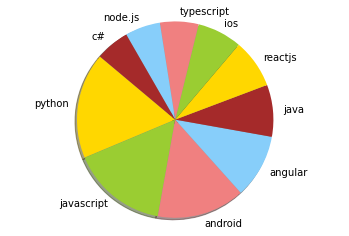

In [160]:
first = [i[0] for i in x]
second = [i[1] for i in x]

# Data to plot
labels = first
print(labels)
sizes = second
print(sizes)
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'brown']
explode = (0.001,) * 10  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors, shadow=True, startangle=140)

plt.axis('equal')
plt.show()